In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize as normalizeSk


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [117]:
headerRow = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income', 'Approved']

df = pd.read_csv('/content/crx.data', names = headerRow)

display(df)
dataset=df.copy()

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Missing Values

In [118]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
dataset = dataset.replace('?', np.nan)
# dataset.fillna(method = 'ffill', inplace = True)
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
print(features_with_na)
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')



['Gender', 'Age', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Zip Code']
Gender 0.0174  % missing values
Age 0.0174  % missing values
Married 0.0087  % missing values
Bank Customer 0.0087  % missing values
Education 0.013  % missing values
Ethnicity 0.013  % missing values
Zip Code 0.0188  % missing values


# Numerical Values

In [119]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  4


,Debt,Years Employed,Credit Score,Income
0,0.000,1.25,1,0
1,4.460,3.04,6,560
2,0.500,1.50,0,824
3,1.540,3.75,5,3
4,5.625,1.71,0,0


In [120]:
discrete_feature=[feature for feature in dataset if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 11


In [121]:
dataset["Approved"]

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Approved, Length: 690, dtype: object

In [122]:
dataset[discrete_feature].head()

,Gender,Married,Bank Customer,Education,Ethnicity,Prior Default,Employed,Credit Score,Driving License,Citizenship,Approved
0,b,u,g,w,v,t,t,1,f,g,+
1,a,u,g,q,h,t,t,6,f,g,+
2,a,u,g,q,h,t,f,0,f,g,+
3,b,u,g,w,v,t,t,5,t,g,+
4,b,u,g,w,v,t,f,0,f,s,+


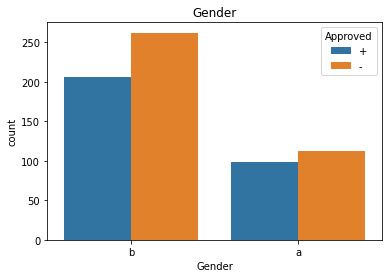

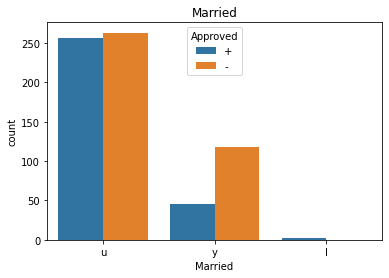

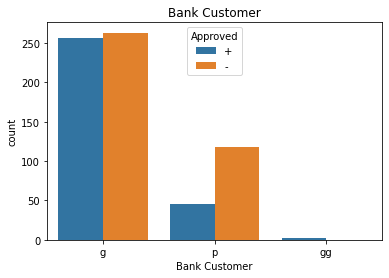

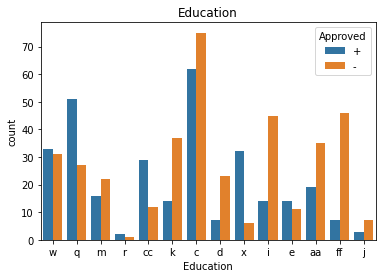

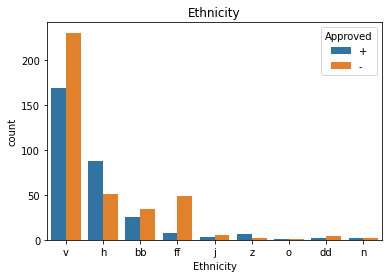

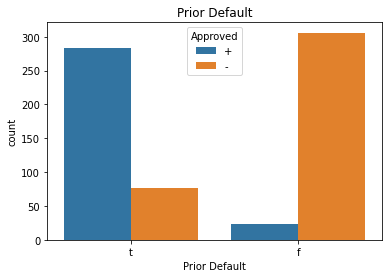

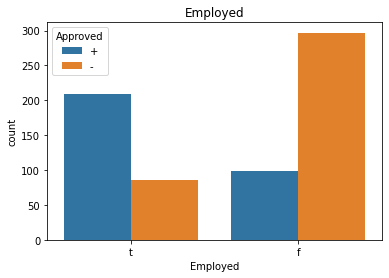

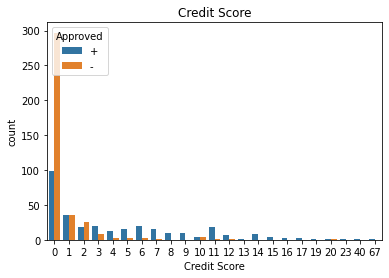

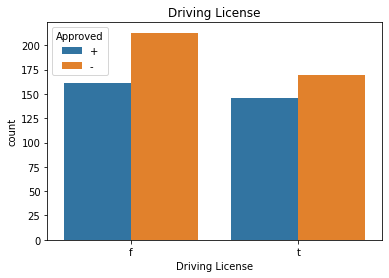

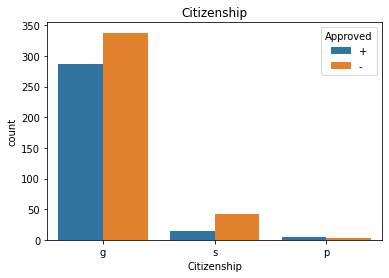

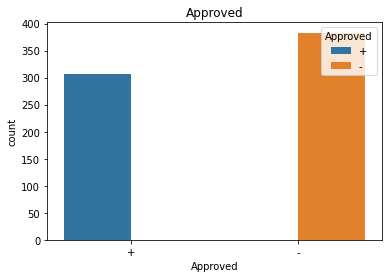

In [123]:
i=1
for feature in discrete_feature:
  plt.figure(i)
  i=i+1
  plt.xlabel(feature)
  
  plt.title(feature)
  sns.countplot(x = dataset[feature],hue=dataset["Approved"])
  

In [124]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


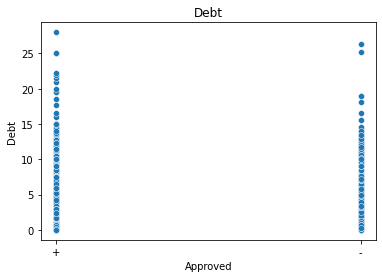

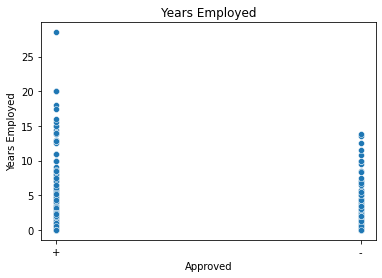

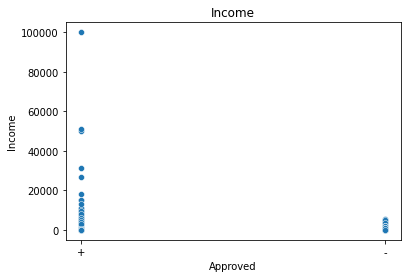

In [125]:
for feature in continuous_feature:
  plt.figure(i)
  plt.ylabel(feature)
  
  plt.title(feature)

  i=i+1
  sns.scatterplot(y = dataset[feature],x = dataset["Approved"],data = dataset)

In [126]:
def filterDf(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

def handleMissingNumeric(df, colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())

def fillUnknown(df, colNames):
    for col in colNames:
        temp = df[col].value_counts().to_dict()    
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)



In [127]:
# To replace ? using pd


#To replace ? using mine
#fillUnknown(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship'])
handleMissingNumeric(dataset, ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income'])

#sns.distplot(df['Age'])
#filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

# dim = (12, 8)
# fig, ax = plt.subplots(figsize = dim)


# sns.countplot(data = df, x = 'Citizenship')
# features = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']


<AxesSubplot:>

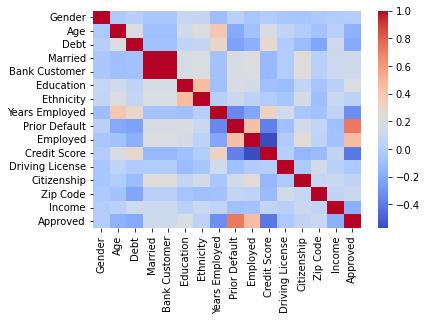

In [128]:











#p = features[5]
#sns.distplot(df[p])

#sns.set()
#cols = ['Age', 'Income', 'Credit Score', 'Debt', 'Years Employed']
#sns.pairplot(df[cols], size = 2.5)
#plt.show();


allFeatures = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income']


kaamWaleFeatures = []

filterDf(dataset, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

cMatrix = dataset.corr()
sns.heatmap(cMatrix, annot = False, cmap = 'coolwarm')



In [129]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Approved']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [130]:
dataset = pd.concat([dataset[['Approved']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [131]:
dataset

,Approved,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income
0,0,0.0,0.256842,0.000000,0.000000,0.000000,0.000000,0.000000,0.043860,0.0,0.0,0.014925,0.0,0.0,0.1010,0.00000
1,0,0.5,0.675489,0.159286,0.000000,0.000000,0.071429,0.111111,0.106667,0.0,0.0,0.089552,0.0,0.0,0.0215,0.00560
2,0,0.5,0.161654,0.017857,0.000000,0.000000,0.071429,0.111111,0.052632,0.0,1.0,0.000000,0.0,0.0,0.1400,0.00824
3,0,0.0,0.211729,0.055000,0.000000,0.000000,0.000000,0.000000,0.131579,0.0,0.0,0.074627,1.0,0.0,0.0500,0.00003
4,0,0.0,0.096541,0.200893,0.000000,0.000000,0.000000,0.000000,0.060000,0.0,1.0,0.000000,0.0,0.5,0.0600,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0.0,0.110226,0.360179,0.333333,0.333333,0.714286,0.111111,0.043860,1.0,1.0,0.000000,0.0,0.0,0.1300,0.00000
686,1,0.5,0.134135,0.026786,0.000000,0.000000,0.428571,0.000000,0.070175,1.0,0.0,0.029851,1.0,0.0,0.1000,0.00394
687,1,0.5,0.172932,0.482143,0.333333,0.333333,0.857143,0.333333,0.070175,1.0,0.0,0.014925,1.0,0.0,0.1000,0.00001
688,1,0.0,0.062707,0.007321,0.000000,0.000000,0.785714,0.000000,0.001404,1.0,1.0,0.000000,0.0,0.0,0.1400,0.00750


In [132]:
dataset.describe()

,Approved,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.555072,0.169565,0.267942,0.169954,0.087440,0.087440,0.433230,0.104831,0.078014,0.476812,0.572464,0.035821,0.457971,0.052899,0.092007,0.010174
std,0.497318,0.254597,0.178245,0.177792,0.159381,0.159381,0.279346,0.176105,0.117422,0.499824,0.495080,0.072581,0.498592,0.171729,0.086080,0.052101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.134135,0.035714,0.000000,0.000000,0.142857,0.000000,0.005789,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000
50%,1.000000,0.000000,0.223684,0.098214,0.000000,0.000000,0.428571,0.000000,0.035088,0.000000,1.000000,0.000000,0.000000,0.000000,0.080000,0.000050
75%,1.000000,0.500000,0.360263,0.257411,0.000000,0.000000,0.642857,0.111111,0.092105,1.000000,1.000000,0.044776,1.000000,0.000000,0.136000,0.003955
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
dataset.isnull().sum()

Approved           0
Gender             0
Age                0
Debt               0
Married            0
Bank Customer      0
Education          0
Ethnicity          0
Years Employed     0
Prior Default      0
Employed           0
Credit Score       0
Driving License    0
Citizenship        0
Zip Code           0
Income             0
dtype: int64

In [134]:
#fig, ax= plt.subplots()

#ax.scatter(df['Debt'], df['Age'])
#ax.set_xlabel('Debt')
#ax.set_ylabel('Age')


#df.columns = range(df.shape[1])
#predFeatures = range(df.shape[1] - 1)
#targetFeature = [df.shape[1] - 1]



#x = ['Gender', 'Age', 'Debt','Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income']
#y = ['Approved']

df=dataset.copy()

x = ['Gender', 'Age', 'Debt', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Income']
y = ['Approved']

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[x], df[y],test_size=0.30,random_state=2)

#trainDf, testDf = splitWoRandom(df, 0.7)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

trainAcc = []
testAcc = []

for i in range(1, 2):
    
    dtc = LogisticRegression(random_state = 0)

    dtc.fit(xTrain, yTrain)
    
    trainPred = dtc.predict(xTrain)
    trainAcc.append(score(trainPred, yTrain)*100)
    
    #print(round(score(trainPred, trainDf[y]), 4))

    testPred = dtc.predict(xTest)
    testAcc.append(score(testPred, yTest)*100)
    
    print('{}, {}, {}'.format(i, round(score(trainPred, yTrain), 4), round(score(testPred, yTest), 4)))
    
    #print('Test : ', score(testPred, testDf[y]))


1, 0.8427, 0.8841


In [136]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.958592, Test : 0.874396


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

tol = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
max_iter = [50, 100, 150, 200, 250, 300]
param_grid = dict(tol=tol, max_iter=max_iter)

grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)


scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(xTrain)
rescaledX_test = scaler.fit_transform(xTest)

rescaledX = scaler.fit_transform(xTrain)

grid_model_result = grid_model.fit(xTrain, yTrain)

best_score, best_params = (grid_model_result.best_score_, grid_model_result.best_params_)

print("Best: %f using %s" % (best_score, grid_model_result.best_params_))

Best: 0.842633 using {'max_iter': 50, 'tol': 0.0001}


In [138]:
dtc = LogisticRegression(tol = 0.0001, max_iter = 300)
dtc.fit(xTrain, yTrain)

trainPred = dtc.predict(xTrain)

testPred = dtc.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.84265, Test : 0.884058


In [139]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.958592, Test : 0.874396


In [140]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(xTrain, yTrain)

trainPred = mlp.predict(xTrain)
testPred = mlp.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.871636, Test : 0.879227


In [141]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = LogisticRegression(tol = 0.0001, max_iter = 300),random_state=0)
clf.fit(xTrain, yTrain)

clf.predict(xTrain)

trainPred = clf.predict(xTrain)
testPred = clf.predict(xTest)

print('Train : {}, Test : {}'.format(round(score(trainPred, yTrain), 6), round(score(testPred, yTest), 6)))

Train : 0.84265, Test : 0.884058
